In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [67]:
#import data
df = pd.read_csv('D:/E/PENS/Semester 7/pengembangan aplikasi/Seismie/data/combined/combined.csv')
df.head()

,time,latitude,longitude,depth,magnitude,place,source
0,2024-12-31T15:19:50.452Z,-6.6786,128.3120,274.863,4.0,"250 km NE of Lospalos, Timor Leste",USGS
1,2024-12-31T08:15:15.744Z,-7.7377,128.0700,128.912,4.4,"146 km NE of Lospalos, Timor Leste",USGS
2,2024-12-30T19:21:33.371Z,5.0395,127.5491,122.595,4.4,"210 km SE of Pondaguitan, Philippines",USGS
3,2024-12-30T16:26:12.478Z,-7.5432,128.2118,176.667,4.2,"172 km NE of Lospalos, Timor Leste",USGS
4,2024-12-30T00:43:14.853Z,2.4630,128.1684,55.415,4.1,"83 km NNE of Tobelo, Indonesia",USGS


spread place column to get other insight

In [68]:

def split_place(place):
    try:
        distance = place.split(" km ")[0]  
        rest = place.split(" km ")[1]

        direction = rest.split(" of ")
        location_country = rest.split(" of ")[1]

        if ", " in location_country:
            location, country = location_country.split(", ", 1)
        else:
            location = location_country
            country = None

        return pd.Series([distance, direction, location, country])
    except:
        return pd.Series([None, None, None, None])

df[['distance_km', 'direction', 'reference_location', 'country']] = df['place'].apply(split_place)


In [69]:
df

,time,latitude,longitude,depth,magnitude,place,source,distance_km,direction,reference_location,country
0,2024-12-31T15:19:50.452Z,-6.6786,128.3120,274.863,4.00,"250 km NE of Lospalos, Timor Leste",USGS,250,"[NE, Lospalos, Timor Leste]",Lospalos,Timor Leste
1,2024-12-31T08:15:15.744Z,-7.7377,128.0700,128.912,4.40,"146 km NE of Lospalos, Timor Leste",USGS,146,"[NE, Lospalos, Timor Leste]",Lospalos,Timor Leste
2,2024-12-30T19:21:33.371Z,5.0395,127.5491,122.595,4.40,"210 km SE of Pondaguitan, Philippines",USGS,210,"[SE, Pondaguitan, Philippines]",Pondaguitan,Philippines
3,2024-12-30T16:26:12.478Z,-7.5432,128.2118,176.667,4.20,"172 km NE of Lospalos, Timor Leste",USGS,172,"[NE, Lospalos, Timor Leste]",Lospalos,Timor Leste
4,2024-12-30T00:43:14.853Z,2.4630,128.1684,55.415,4.10,"83 km NNE of Tobelo, Indonesia",USGS,83,"[NNE, Tobelo, Indonesia]",Tobelo,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...
71801,1960-03-05T13:49:24.390Z,0.7690,128.9090,30.000,6.61,"145 km SE of Tobelo, Indonesia",USGS,145,"[SE, Tobelo, Indonesia]",Tobelo,Indonesia
71802,1960-02-09T23:55:56.800Z,-3.9950,127.7310,35.000,6.52,"60 km WSW of Ambon, Indonesia",USGS,60,"[WSW, Ambon, Indonesia]",Ambon,Indonesia
71803,1960-01-23T17:56:40.420Z,-4.1190,127.4490,35.000,6.16,"94 km WSW of Ambon, Indonesia",USGS,94,"[WSW, Ambon, Indonesia]",Ambon,Indonesia
71804,1960-01-23T07:31:21.530Z,-4.0710,127.5220,25.000,6.22,"84 km WSW of Ambon, Indonesia",USGS,84,"[WSW, Ambon, Indonesia]",Ambon,Indonesia


In [70]:
df['country'].unique()

array(['Timor Leste', 'Philippines', 'Indonesia', None, 'Palau',
       'Papua New Guinea', 'Laikit II (Dimembe), Indonesia', 'Malaysia',
       'Australia', 'California', 'Brunei'], dtype=object)

In [71]:
#take indonesia data only
df_indonesia = df[df['country'] == 'Indonesia']
df_indonesia.head()

,time,latitude,longitude,depth,magnitude,place,source,distance_km,direction,reference_location,country
4,2024-12-30T00:43:14.853Z,2.4630,128.1684,55.415,4.1,"83 km NNE of Tobelo, Indonesia",USGS,83,"[NNE, Tobelo, Indonesia]",Tobelo,Indonesia
5,2024-12-29T06:38:41.963Z,-4.4675,137.0098,9.948,4.1,"172 km NW of Agats, Indonesia",USGS,172,"[NW, Agats, Indonesia]",Agats,Indonesia
6,2024-12-28T21:55:08.881Z,0.2717,122.0891,141.554,4.6,"112 km WSW of Gorontalo, Indonesia",USGS,112,"[WSW, Gorontalo, Indonesia]",Gorontalo,Indonesia
8,2024-12-28T06:22:39.391Z,0.3190,129.6915,10.000,4.3,"109 km NW of Waisai, Indonesia",USGS,109,"[NW, Waisai, Indonesia]",Waisai,Indonesia
9,2024-12-28T05:46:42.954Z,-5.1526,102.4081,34.713,4.5,"150 km S of Bengkulu, Indonesia",USGS,150,"[S, Bengkulu, Indonesia]",Bengkulu,Indonesia


Exploration Data Analysis (EDA)
======================================================
Exploratory Data Analysis (EDA) dilakukan untuk memahami pola, distribusi, dan hubungan antardata sebelum masuk ke tahap pemodelan. Tahap ini membantu mengidentifikasi outlier, missing values, serta insight awal yang menjadi dasar pengambilan keputusan, sebelum dilakukan preprocessing.

In [72]:
df_indonesia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52489 entries, 4 to 71805
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                52489 non-null  object 
 1   latitude            52489 non-null  float64
 2   longitude           52489 non-null  float64
 3   depth               52489 non-null  float64
 4   magnitude           52489 non-null  float64
 5   place               52489 non-null  object 
 6   source              52489 non-null  object 
 7   distance_km         52489 non-null  object 
 8   direction           52489 non-null  object 
 9   reference_location  52489 non-null  object 
 10  country             52489 non-null  object 
dtypes: float64(4), object(7)
memory usage: 4.8+ MB


In [73]:
df_indonesia.describe()

,latitude,longitude,depth,magnitude
count,52489.000000,52489.000000,52489.000000,52489.000000
mean,-2.559030,119.683669,69.603948,4.579720
std,4.090787,13.173289,89.213441,0.492957
min,-11.000000,95.000000,0.000000,2.700000
25%,-5.885000,107.203800,30.000000,4.300000
50%,-2.398200,123.884300,35.000000,4.500000
75%,1.070000,128.733000,74.100000,4.800000
max,6.192000,140.998000,674.300000,8.600000


#### 🔵 Scatter Plot

Scatter plot adalah grafik yang menampilkan hubungan antara dua variabel dalam bentuk titik-titik. Setiap titik mewakili satu observasi. Scatter plot digunakan untuk melihat pola hubungan (linear, non-linear), kelompok data (clusters), serta mendeteksi outlier.

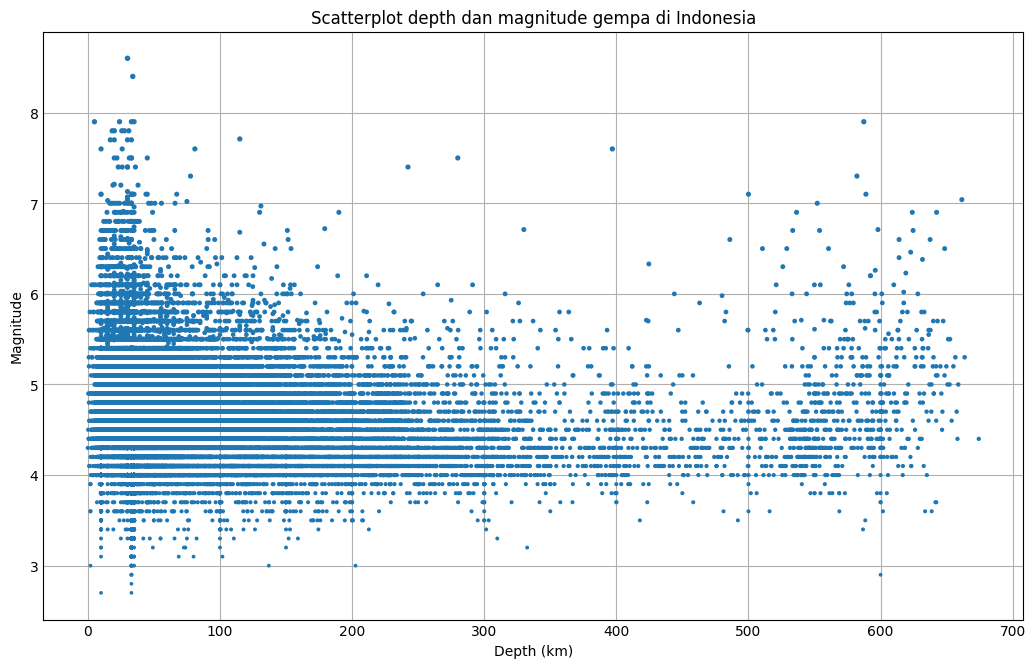

In [74]:
plt.style.use('_mpl-gallery')

x = df_indonesia['depth']
y = df_indonesia['magnitude']

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x, y, color='tab:blue', marker='o', s=y)

ax.set(xlabel = 'Depth (km)', ylabel = 'Magnitude', title = 'Scatterplot depth dan magnitude gempa di Indonesia')

plt.show()

#### Boxplot

Boxplot adalah visualisasi statistik yang menampilkan ringkasan distribusi data melalui lima angka utama (minimum, kuartil 1, median, kuartil 3, dan maksimum). Grafik ini juga menampilkan outlier, sehingga memudahkan untuk melihat sebaran data, kemiringan distribusi, serta titik-titik yang tidak wajar

Dampak outlier terhdapat cluster
+ Outlier bisa membuat, centroid bergeser tidak sesuai pola asli,cluster menjadi tidak stabil,jumlah cluster tampak salah.
+ Variabel dengan jangkauan yang terlalu besar akan mendominasi perhitungan jarak. Penting jika menggunakan K-Means dan DBSCAN berbasis jarak (distance-based).

🧠 Intinya

Boxplot membantu memastikan kualitas data, skala, dan distribusi sebelum dilakukan clustering.
Dengan memahami outlier, variasi, dan bentuk distribusi, hasil cluster akan lebih:
+ stabil,
+ akurat,
+ representatif terhadap pola data sebenarnya.

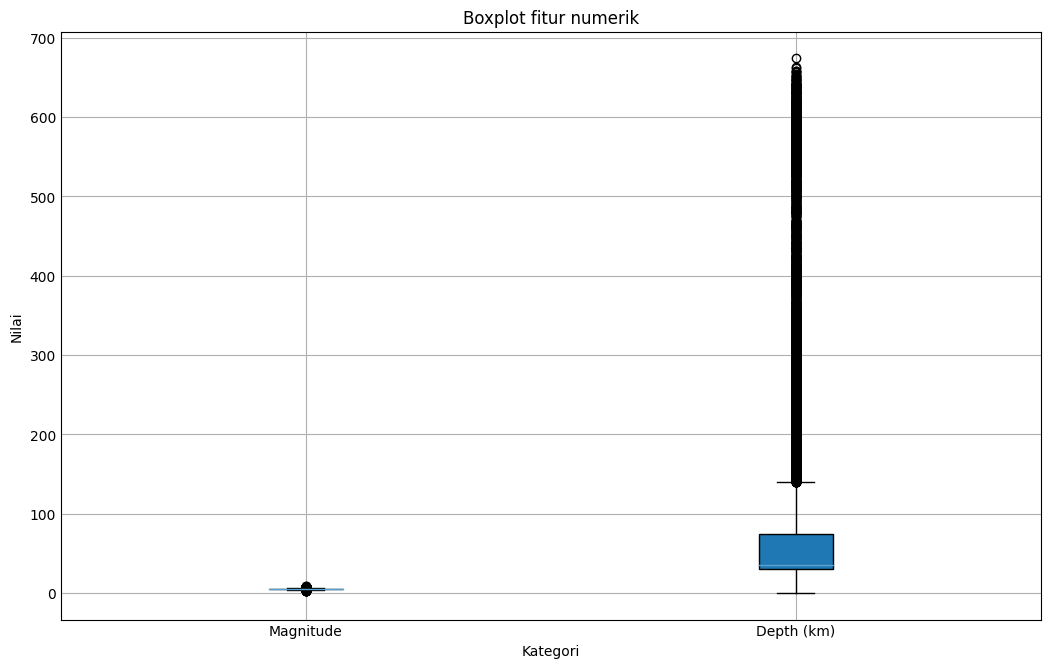

In [75]:
# Buat boxplot
data = [df_indonesia['magnitude'], df_indonesia['depth']]
fig, ax = plt.subplots(figsize = (10,6))
plt.boxplot(data, vert=True, patch_artist=True , labels=['Magnitude', 'Depth (km)'])
plt.title('Boxplot fitur numerik')
plt.xlabel('Kategori')
plt.ylabel('Nilai')
plt.show()

#### Histogram

Histogram adalah jenis visualisasi yang digunakan untuk menunjukkan distribusi frekuensi dari sebuah variabel numerik. Data dibagi ke dalam beberapa “bin” atau interval, lalu setiap batang menunjukkan berapa banyak data yang berada dalam interval tersebut.

Histogram membantu melihat:
+ bentuk distribusi (normal, skewed, bimodal, uniform),
+ sebaran data,
+ konsentrasi nilai,
+ dan potensi adanya outlier atau anomali.

Fungsi:
+ *Memahami pola distribusi* —> apakah data condong ke kiri/kanan, simetris, atau punya lebih dari satu puncak.
+ *Menilai kepadatan data* —> interval mana yang memiliki data paling banyak.
+ *Mendeteksi nilai ekstrem* —> batang yang jauh terpisah bisa menunjukkan outlier.
+ *Membantu menentukan transformasi data* —> misalnya log transform untuk data sangat skewed.

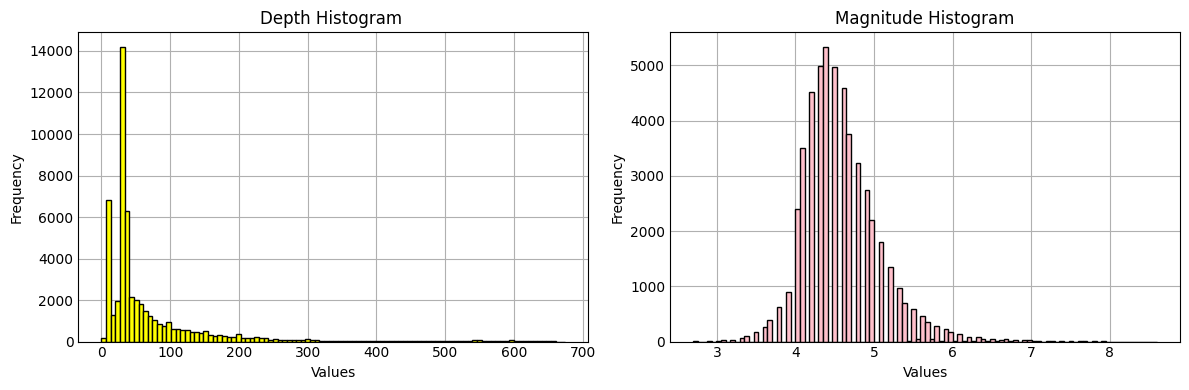

In [76]:

x = df_indonesia['depth']
y = df_indonesia['magnitude']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].hist(x, bins=100, color='Yellow', edgecolor='black')
axes[0].set_title('Depth Histogram ')

axes[1].hist(y, bins=100, color='Pink', edgecolor='black')
axes[1].set_title('Magnitude Histogram')

for ax in axes:
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()

plt.show()

Heatmap korelasi untuk melihat apakah variabel saling memengaruhi dan apakah ada hubungan yang relevan untuk clustering.

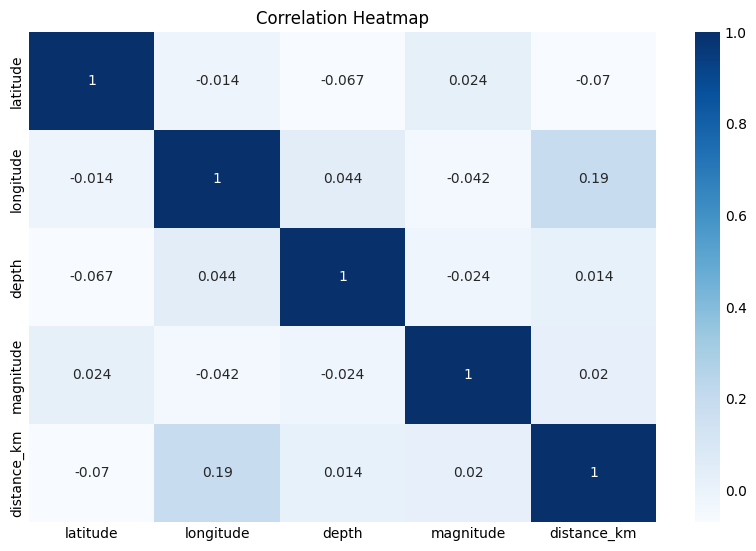

In [77]:
#korelasi antar variabel numerik
numeric_cols = ['latitude', 'longitude', 'depth', 'magnitude', 'distance_km']
corr = df_indonesia[numeric_cols].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

Mengidentifikasi apakah suatu wilayah di indonesia lebih cenderung mengalami gempa dangkal atau dalam.

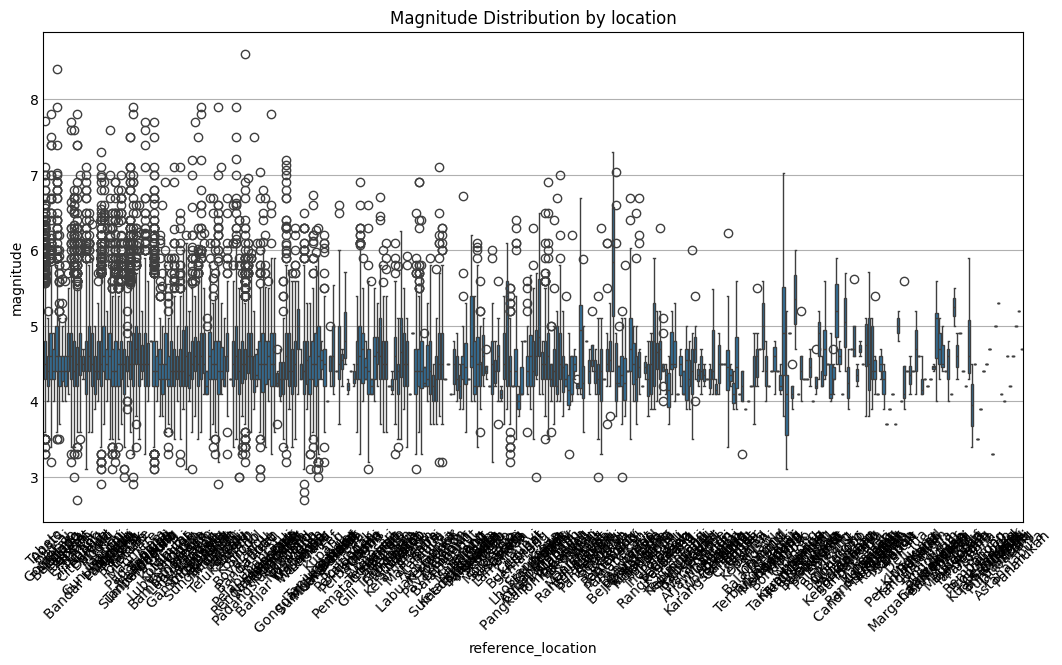

In [78]:
#Distribusi Magnitude per Lokasi (Boxplot)

plt.figure(figsize=(10,5))
sns.boxplot(data=df_indonesia, x='reference_location', y='magnitude')
plt.title("Magnitude Distribution by location")
plt.xticks(rotation=45)
plt.show()

Mengubah kolom waktu menjadi datetime dan melihat frekuensi gempa per hari untuk pola temporal.

C:\Users\Najma\AppData\Local\Temp\ipykernel_3792\3306919583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indonesia['time'] = pd.to_datetime(df_indonesia['time'])


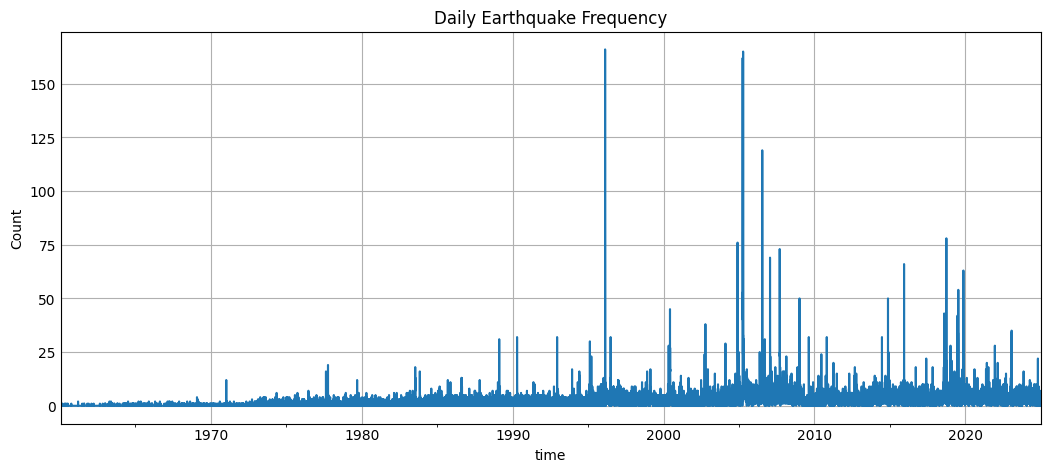

In [79]:
#Time Series: Frekuensi Gempa per Har
df_indonesia['time'] = pd.to_datetime(df_indonesia['time'])

df_daily = df_indonesia.set_index('time').resample('D').size()

plt.figure(figsize=(10,4))
df_daily.plot()
plt.title("Daily Earthquake Frequency")
plt.ylabel("Count")
plt.show()

Scatter plot geografis untuk melihat pola sebaran gempa dan zona konsentrasi gempa.

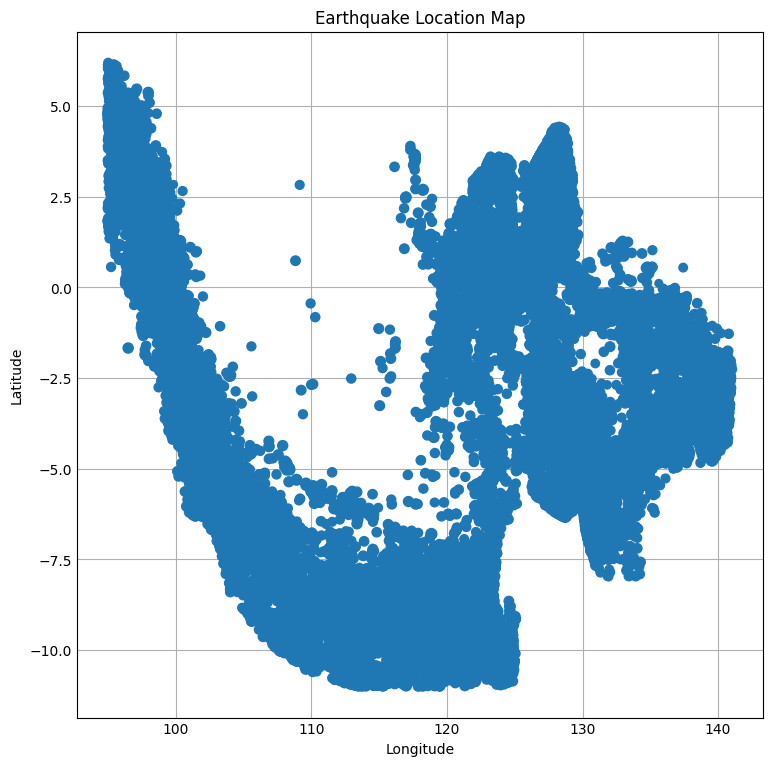

In [80]:
#Peta Sebaran Gempa (Latitude vs Longitude)

plt.figure(figsize=(7,7))
plt.scatter(df_indonesia['longitude'], df_indonesia['latitude'], s=df_indonesia['magnitude']*10)
plt.title("Earthquake Location Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Density plot menunjukkan bentuk distribusi yang lebih halus dibanding histogram dan mendeteksi pola multi-puncak.

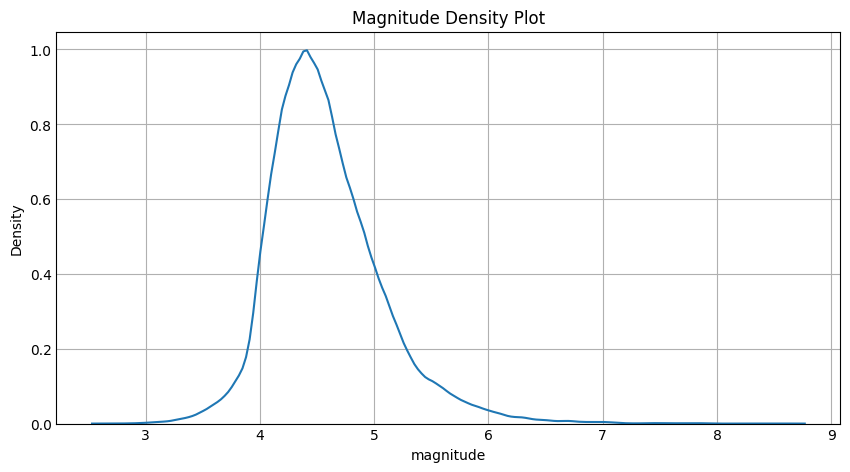

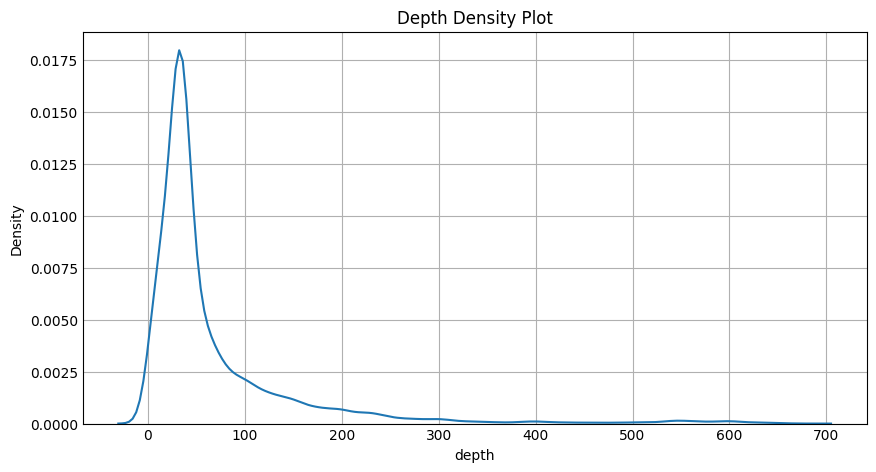

In [81]:
#KDE Plot (Magnitude & Depth)

plt.figure(figsize=(8,4))
sns.kdeplot(df_indonesia['magnitude'])
plt.title("Magnitude Density Plot")
plt.show()

plt.figure(figsize=(8,4))
sns.kdeplot(df_indonesia['depth'])
plt.title("Depth Density Plot")
plt.show()


Mengelompokkan gempa berdasarkan standar kedalaman seismologi untuk memahami kelas gempa di dataset.

In [82]:
def depth_category(d):
    if d < 70:
        return "Shallow"
    elif d < 300:
        return "Intermediate"
    else:
        return "Deep"

df_indonesia["depth_category"] = df_indonesia["depth"].apply(depth_category)

df_indonesia['depth_category'].value_counts()


C:\Users\Najma\AppData\Local\Temp\ipykernel_3792\3507121533.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indonesia["depth_category"] = df_indonesia["depth"].apply(depth_category)


depth_category
Shallow         38650
Intermediate    12281
Deep             1558
Name: count, dtype: int64

PreProcessing Data
=========================================
Preprocessing adalah tahap penting sebelum melakukan clustering karena algoritma seperti K-Means, DBSCAN, atau Hierarchical Clustering sangat sensitif terhadap skala data, outlier, dan fitur yang tidak relevan. Berikut langkah-langkah umum dalam preprocessing untuk clustering:

Cara Mengatasi Outlier

Outlier adalah nilai yang jauh berbeda dari kebanyakan data. Outlier bisa muncul karena kesalahan input data, proses pengukuran, atau memang fenomena alami. Berikut teknik-teknik penanganannya.

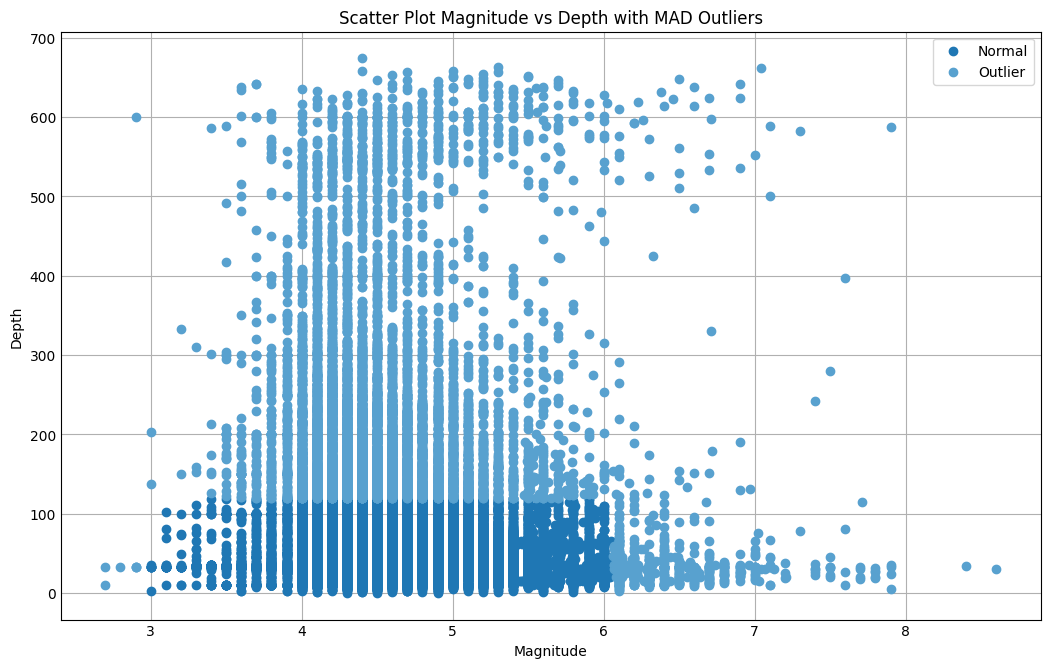

In [83]:
mag = df_indonesia['magnitude']
depth = df_indonesia['depth']

def modified_z(data):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    return 0.6745 * (data - median) / mad

mz_mag = modified_z(mag)
mz_depth = modified_z(depth)

threshold = 3.5

outlier_mask = (np.abs(mz_mag) > threshold) | (np.abs(mz_depth) > threshold)

plt.figure(figsize=(10, 6))

plt.scatter(mag[~outlier_mask], depth[~outlier_mask], label="Normal")
plt.scatter(mag[outlier_mask], depth[outlier_mask], label="Outlier", alpha=1)

plt.xlabel("Magnitude")
plt.ylabel("Depth")
plt.title("Scatter Plot Magnitude vs Depth with MAD Outliers")
plt.legend()
plt.show()



In [84]:
print("MAD magnitude:", mz_mag)
print("MAD depth:", mz_depth)


MAD magnitude: 4       -0.899333
5       -0.899333
6        0.224833
8       -0.449667
9        0.000000
           ...   
71801    4.743983
71802    4.541633
71803    3.732233
71804    3.867133
71805    4.136933
Name: magnitude, Length: 52489, dtype: float64
MAD depth: 4        0.849995
5       -1.043060
6        4.436461
8       -1.040895
9       -0.011949
           ...   
71801   -0.208179
71802    0.000000
71803    0.000000
71804   -0.416358
71805   -0.416358
Name: depth, Length: 52489, dtype: float64


In [85]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis

# --- CONTOH DATAFRAME ---
# Misal df punya kolom: 'depth' dan 'value'
# df = pd.read_csv("data.csv")

# Ambil dua kolom
cols = ["depth", "magnitude"]
data = df_indonesia[cols]

# 1. Hitung mean vector
mean_vec = data.mean().values

# 2. Hitung covariance matrix & inverse covariance matrix
cov_matrix = np.cov(data.values, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# 3. Hitung Mahalanobis Distance
md = []
for i in range(len(data)):
    x = data.iloc[i].values
    dist = mahalanobis(x, mean_vec, inv_cov_matrix)
    md.append(dist)

df_indonesia["mahalanobis"] = md

# 4. Threshold (menggunakan chi-square)
# df: 2 kolom → df=2 → Chi-square 97.5% ≈ 7.38
threshold = np.sqrt(7.378)

df_indonesia["outlier"] = df_indonesia["mahalanobis"] > threshold

# Tampilkan outlier
print(df_indonesia[df_indonesia["outlier"] == True])


                                  time  latitude  longitude    depth  \
10    2024-12-27 22:39:56.605000+00:00    3.2544   123.1875  480.874   
121   2024-12-05 22:33:19.781000+00:00   -5.9965   127.7665  400.302   
190   2024-11-20 08:09:01.215000+00:00   -7.3225   120.1729  456.221   
220   2024-11-14 15:42:52.037000+00:00   -7.1794   121.1959  534.323   
227   2024-11-13 04:08:12.862000+00:00   -7.3442   122.4577  546.963   
...                                ...       ...        ...      ...   
71801 1960-03-05 13:49:24.390000+00:00    0.7690   128.9090   30.000   
71802 1960-02-09 23:55:56.800000+00:00   -3.9950   127.7310   35.000   
71803 1960-01-23 17:56:40.420000+00:00   -4.1190   127.4490   35.000   
71804 1960-01-23 07:31:21.530000+00:00   -4.0710   127.5220   25.000   
71805 1960-01-23 04:41:03.960000+00:00   -3.9980   127.4560   25.000   

       magnitude                                 place source distance_km  \
10          4.70        269 km NW of Manado, Indonesia   U

C:\Users\Najma\AppData\Local\Temp\ipykernel_3792\1225508794.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indonesia["mahalanobis"] = md
C:\Users\Najma\AppData\Local\Temp\ipykernel_3792\1225508794.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indonesia["outlier"] = df_indonesia["mahalanobis"] > threshold


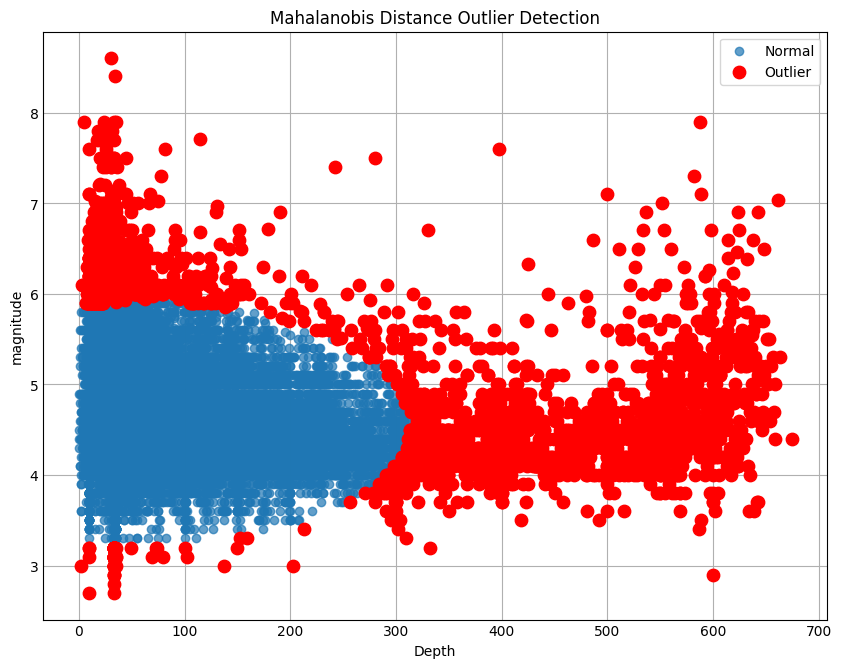

In [86]:
# --------------------------
# 3. Plot scatter: normal vs outlier
# --------------------------
plt.figure(figsize=(8, 6))

# Normal points
plt.scatter(
    df_indonesia.loc[df_indonesia["outlier"] == False, "depth"],
    df_indonesia.loc[df_indonesia["outlier"] == False, "magnitude"],
    label="Normal",
    alpha=0.7
)

# Outliers (highlight)
plt.scatter(
    df_indonesia.loc[df_indonesia["outlier"] == True, "depth"],
    df_indonesia.loc[df_indonesia["outlier"] == True, "magnitude"],
    color="red",
    label="Outlier",
    s=80
)

plt.title("Mahalanobis Distance Outlier Detection")
plt.xlabel("Depth")
plt.ylabel("magnitude")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Najma\AppData\Local\Temp\ipykernel_3792\2045188576.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indonesia['cluster'] = labels


cluster
 0    52317
-1      141
 1       26
 2        5
Name: count, dtype: int64


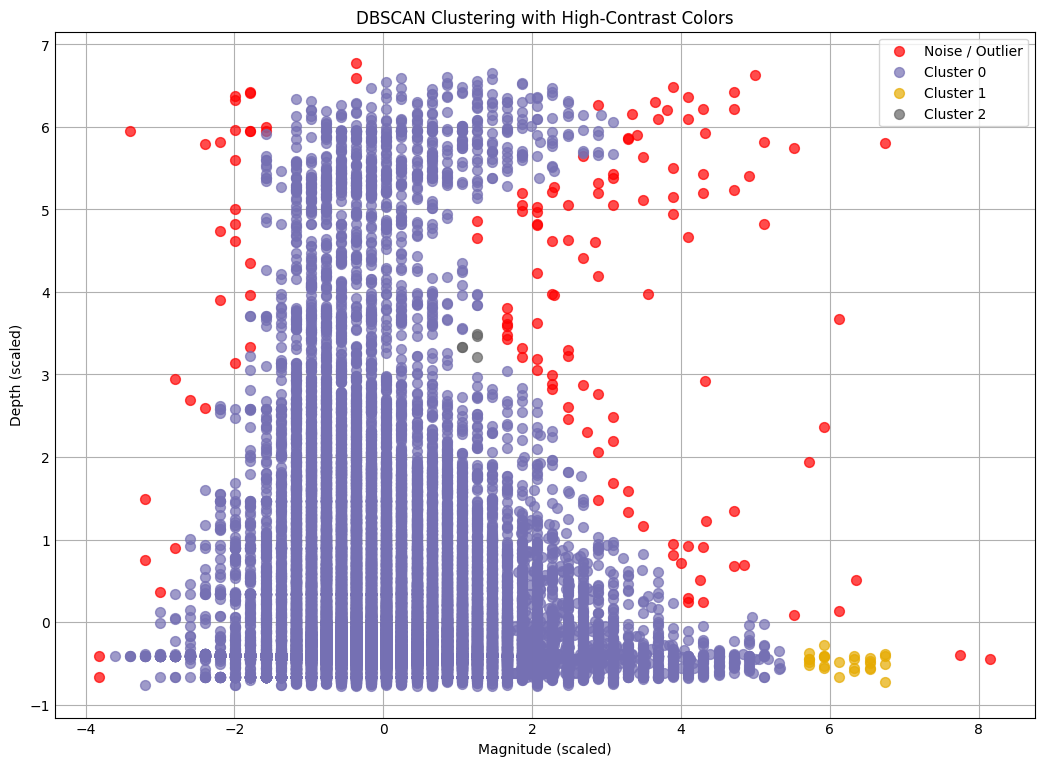

In [87]:
# -------------------------------------
# 1. Ambil dua kolom
# -------------------------------------
X = df_indonesia[['magnitude', 'depth']]

# -------------------------------------
# 2. Normalisasi (StandardScaler)
# -------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------------
# 3. DBSCAN Clustering
# -------------------------------------
# eps dan min_samples bisa kamu tuning
db = DBSCAN(eps=0.3, min_samples=10)
labels = db.fit_predict(X_scaled)

# simpan hasil cluster ke dataframe
df_indonesia['cluster'] = labels

print(df_indonesia['cluster'].value_counts())

# -------------------------------------
# 4. Plot dengan warna kontras
# -------------------------------------
plt.figure(figsize=(10, 7))

unique_labels = sorted(set(labels))
colors = cm.Dark2(np.linspace(0, 1, len(unique_labels)))  # warna kontras

for label, color in zip(unique_labels, colors):
    cluster_data = X_scaled[labels == label]
    
    if label == -1:
        # warna khusus untuk noise
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
                    c="red", label="Noise / Outlier", alpha=0.7, s=50)
    else:
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
                    color=color, label=f"Cluster {label}", alpha=0.7, s=50)

plt.xlabel("Magnitude (scaled)")
plt.ylabel("Depth (scaled)")
plt.title("DBSCAN Clustering with High-Contrast Colors")
plt.legend()
plt.grid(True)
plt.show()

In [88]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.563240385343527


In [89]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(X_scaled, labels)
print("DBI:", dbi)


DBI: 1.7771048607839153


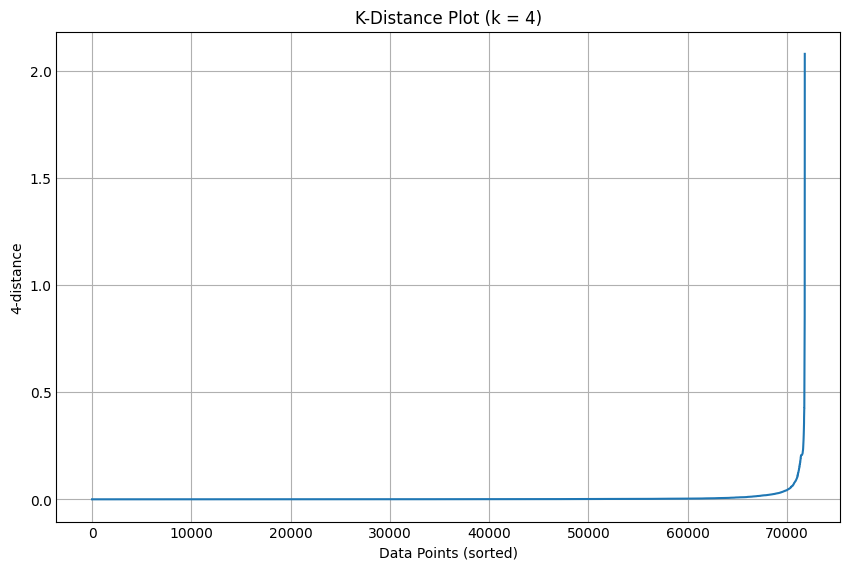

In [90]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# --- 1. Ambil dua fitur untuk clustering ---
X = df[['magnitude', 'depth']].values

# --- 2. Normalisasi ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. Tentukan k = min_samples - 1 ---
min_samples = 5
k = min_samples - 1

# --- 4. Hitung k-distance menggunakan NearestNeighbors ---
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Ambil jarak ke tetangga ke-k
k_distances = distances[:, k]

# --- 5. Urutkan jaraknya ---
k_distances_sorted = np.sort(k_distances)

# --- 6. Plot k-distance curve ---
plt.figure(figsize=(8,5))
plt.plot(k_distances_sorted)
plt.xlabel("Data Points (sorted)")
plt.ylabel(f"{k}-distance")
plt.title(f"K-Distance Plot (k = {k})")
plt.grid(True)
plt.show()


eps=0.05 | Silhouette=0.0384 | DBI=1.7621
eps=0.10 | Silhouette=0.0531 | DBI=1.9661
eps=0.15 | Silhouette=0.0546 | DBI=2.4975
eps=0.20 | Silhouette=0.0606 | DBI=2.6418
eps=0.25 | Silhouette=0.6892 | DBI=0.7628
eps=0.30 | Silhouette=0.5632 | DBI=1.7771
eps=0.35 | Silhouette=0.6967 | DBI=0.7968
eps=0.40 | Silhouette=-1.0000 | DBI=inf
eps=0.45 | Silhouette=-1.0000 | DBI=inf


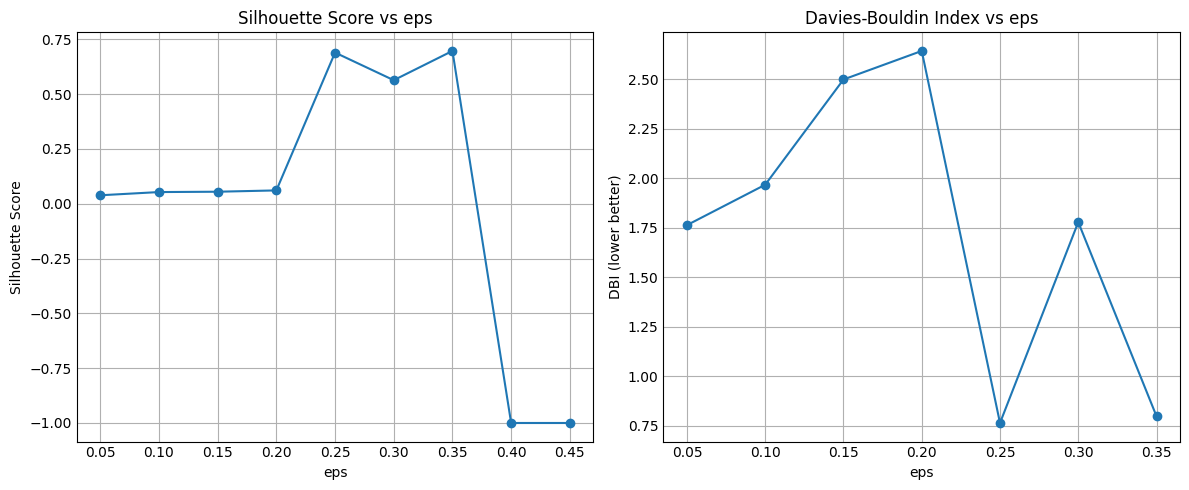


🔍 Hasil Terbaik
Best eps: 0.35000000000000003
Best Silhouette Score: 0.6966841919439247


C:\Users\Najma\AppData\Local\Temp\ipykernel_3792\53946161.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indonesia["cluster"] = best_labels


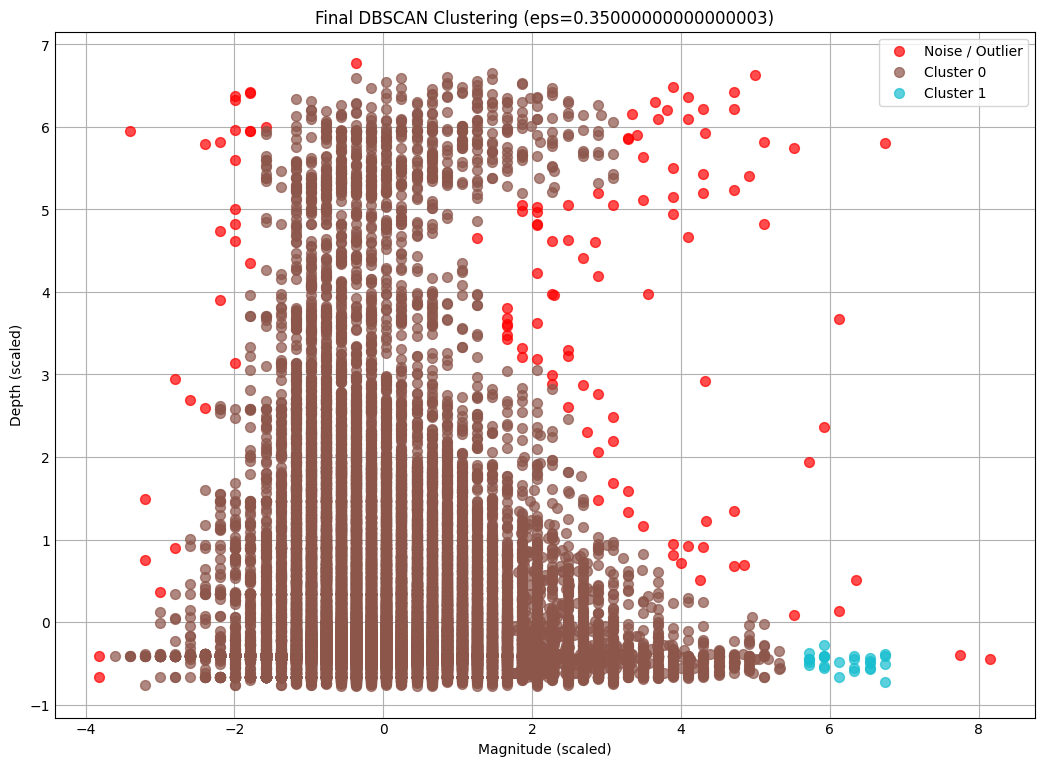

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from matplotlib import cm

# --------------------------------------------------------
# 1. Ambil dua kolom
# --------------------------------------------------------
X = df_indonesia[['magnitude', 'depth']]

# --------------------------------------------------------
# 2. Normalisasi (StandardScaler)
# --------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------------------------------------
# 3. Tuning DBSCAN untuk beberapa nilai eps
# --------------------------------------------------------
eps_values = np.arange(0.05, 0.50, 0.05)
min_samples = 10

sil_scores = []
dbi_scores = []

best_sil = -1
best_eps = None
best_labels = None

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)

    # Minimal harus ada 2 cluster valid
    if len(set(labels)) > 1 and len(set(labels) - {-1}) > 1:
        sil = silhouette_score(X_scaled, labels)
        dbi = davies_bouldin_score(X_scaled, labels)
    else:
        sil = -1
        dbi = np.inf

    sil_scores.append(sil)
    dbi_scores.append(dbi)

    print(f"eps={eps:.2f} | Silhouette={sil:.4f} | DBI={dbi:.4f}")

    # simpan yang terbaik (silhouette terbesar)
    if sil > best_sil:
        best_sil = sil
        best_eps = eps
        best_labels = labels

# --------------------------------------------------------
# 4. Plot performa tuning (Silhouette & DBI)
# --------------------------------------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(eps_values, sil_scores, marker='o')
plt.title("Silhouette Score vs eps")
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(eps_values, dbi_scores, marker='o')
plt.title("Davies-Bouldin Index vs eps")
plt.xlabel("eps")
plt.ylabel("DBI (lower better)")
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n========================")
print("🔍 Hasil Terbaik")
print("========================")
print(f"Best eps: {best_eps}")
print(f"Best Silhouette Score: {best_sil}")

# --------------------------------------------------------
# 5. Clustering Final dengan eps terbaik
# --------------------------------------------------------
df_indonesia["cluster"] = best_labels

# --------------------------------------------------------
# 6. Plot hasil clustering final dengan warna kontras
# --------------------------------------------------------
plt.figure(figsize=(10, 7))

unique_labels = sorted(set(best_labels))
colors = cm.tab10(np.linspace(0, 1, len(unique_labels)))  # warna kontras

for label, color in zip(unique_labels, colors):
    cluster_data = X_scaled[best_labels == label]

    if label == -1:
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1],
                    c="red", label="Noise / Outlier", alpha=0.7, s=50)
    else:
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1],
                    color=color, label=f"Cluster {label}", alpha=0.7, s=50)

plt.xlabel("Magnitude (scaled)")
plt.ylabel("Depth (scaled)")
plt.title(f"Final DBSCAN Clustering (eps={best_eps})")
plt.legend()
plt.grid(True)
plt.show()
